In [ ]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Simulated Annealing w/ 2 variables & sampling size of 0.01

In [ ]:
# define objective function
def f(x):
    x1 = x[0]
    x2 = x[1]
    obj = 0.2 + x1**2 + x2**2 - 0.1*math.cos(6.0*2.1415*x1) - 0.1*math.cos(6.0*3.1415*x2)
    return obj

In [ ]:
# Start location
x_start = [0.8, -0.5]

In [ ]:
# Design variables at mesh points
i1 = np.arange(-1.0,1.0, 0.1)
i2 = np.arange(-1.0,1.0, 0.1)
x1m, x2m = np.meshgrid(i1,i2)

In [ ]:
# Define a surface that we want to minimize
fm = np.zeros(x1m.shape)
for i in range(x1m.shape[0]):
    for j in range(x1m.shape[1]):
        fm[i][j] = 0.2 + x1m[i][j]**2 + x2m[i][j]**2 \
        - 0.1*math.cos(6.0*3.1415*x1m[i][j]) \
        - 0.1*math.cos(6.0*3.1415*x2m[i][j])

Text(0, 0.5, 'x2')

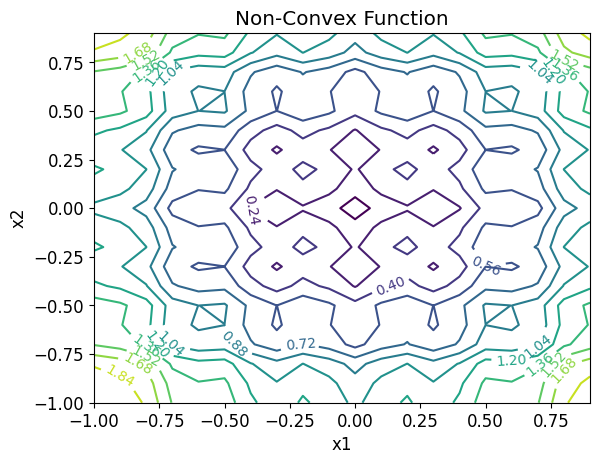

In [ ]:
# Create a contour plot
plt.figure()
# Specify contour lines
lines = np.arange(2,52,4)/25.
# Plot contours
CS = plt.contour(x1m,x2m, fm, lines)
# Label contours
plt.clabel(CS, inline=1, fontsize=10)
# Add some text to the plot
plt.title('Non-Convex Function')
plt.xlabel('x1')
plt.ylabel('x2')

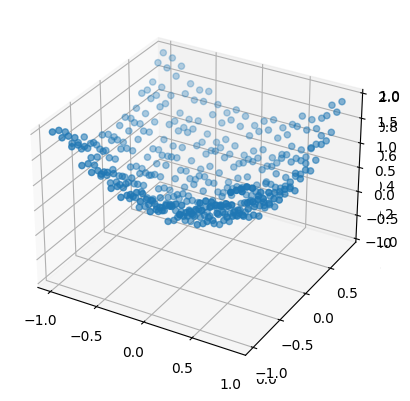

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-1.01, 2.01)
ax.scatter(x1m, x2m, fm)

plt.show()


[19, 3, 18, 2, 3]
[]


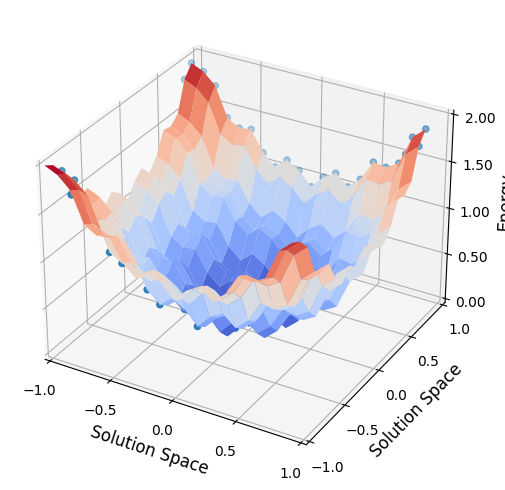

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6,10))

# Plot the surface.
surf = ax.plot_surface(x1m, x2m, fm, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

# Sampling of Points
x_sampling = []
f_sampling = []
n=5
for i in range(n):
    x_sampling.append(random.randint(0,19))
    #f_sampling.append(random.randint(0,19))
print(x_sampling)
print(f_sampling)

x1m_sampling = []
x2m_sampling = []
fm_sampling = []
for j in range(n):
    x1m_sampling.append(x1m[x_sampling[j]])
    x2m_sampling.append(x2m[x_sampling[j]])
    fm_sampling.append(fm[x_sampling[j]])

scatter = ax.scatter(x1m_sampling, x2m_sampling, fm_sampling)

# Customize the z axis.
ax.set_zlim(0, 2)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.xaxis.set_major_locator(LinearLocator(5))
ax.yaxis.set_major_locator(LinearLocator(5))

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')


# Adding labels and title
ax.set_xlabel("Solution Space" , fontsize=12)
ax.set_ylabel("Solution Space", fontsize=12)
ax.set_zlabel("Energy" , fontsize=12)


# Displaying the legend and the plot
#plt.legend()
plt.savefig("objective.pdf")
plt.show()

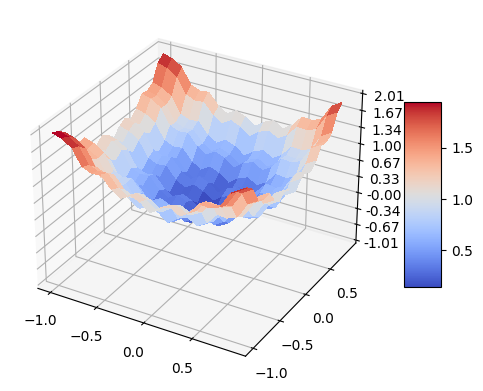

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(x1m, x2m, fm, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 2.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [ ]:
fm.size

8000

In [ ]:
# simulated annealing
# Number of cycles
n = 50
# Number of trials per cycle
m = 50
# Number of accepted solutions
na = 0.0
# Probability of accepting worse solution at the start
p1 = 0.7
p1 = 0.8
# Probability of accepting worse solution at the end
p50 = 0.001
# Initial temperature
t1 = -1.0 / math.log(p1)
# Final temperature
t50 = -1.0 / math.log(p50)
# Fraction reduction every cycle
frac = (t50/t1)**(1.0/(n-1.0))
# Initialize x
x = np.zeros((n+1,2))
x[0] = x_start
xi = np.zeros(2)
xi = x_start
na = na + 1.0

In [ ]:
xi

[-0.3291073713228565, -0.3546822849213853]

In [ ]:
# Current best results so far
xc = np.zeros(2)
xc = x[0]
fc = f(xi)
fs = np.zeros(n+1)
fs[0] = fc
# Current temperature
t = t1
# DeltaE Average
DeltaE_avg = 0.0

In [ ]:
for i in range(n):
    print("Cycle: %d with Temperature: %f" % (i, t))
    for j in range(m):
        # Generate new trial points
        xi[0] = xc[0] + random.random() - 0.5
        xi[1] = xc[1] + random.random() - 0.5

        # Clip to upper and lower bounds
        xi[0] = max(min(xi[0],1.0), -1.0)
        xi[1] = max(min(xi[1],1.0), -1.0)

        DeltaE = abs(f(xi) - fc)
        if (f(xi) > fc):

            # Initialize DeltaE_avg if a worse solution was found
            # on the first iteration
            if (i==0 and j==0): DeltaE_avg = DeltaE

            # objective function is worse
            # generate prob of acceptance
            p = math.exp(-DeltaE/(DeltaE_avg * t))

            # determine whether to accept worse point
            if (random.random() < p):
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                accept = False
        else:

            # objective function is lower, automatically accept
            accept = True

        if (accept == True):

            # update the currently accepted solution
            xc[0] = xi[0]
            xc[1] = xi[1]
            fc = f(xc)

            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na - 1.0) + DeltaE) / na

    # Record the best x values at the end of every cycle
    x[i+1][0] = xc[0]
    x[i+1][1] = xc[1]
    fs[i+1] = fc

    # Lower the temperature for the next cycle
    t = frac * t

# print solution
print( "Best solution: " + str(xc))
print( "Best objective: " + str(fc))

Cycle: 0 with Temperature: 4.481420
Cycle: 1 with Temperature: 4.178228
Cycle: 2 with Temperature: 3.895548
Cycle: 3 with Temperature: 3.631994
Cycle: 4 with Temperature: 3.386270
Cycle: 5 with Temperature: 3.157171
Cycle: 6 with Temperature: 2.943571
Cycle: 7 with Temperature: 2.744423
Cycle: 8 with Temperature: 2.558748
Cycle: 9 with Temperature: 2.385635
Cycle: 10 with Temperature: 2.224234
Cycle: 11 with Temperature: 2.073752
Cycle: 12 with Temperature: 1.933452
Cycle: 13 with Temperature: 1.802644
Cycle: 14 with Temperature: 1.680685
Cycle: 15 with Temperature: 1.566978
Cycle: 16 with Temperature: 1.460963
Cycle: 17 with Temperature: 1.362121
Cycle: 18 with Temperature: 1.269966
Cycle: 19 with Temperature: 1.184046
Cycle: 20 with Temperature: 1.103939
Cycle: 21 with Temperature: 1.029252
Cycle: 22 with Temperature: 0.959618
Cycle: 23 with Temperature: 0.894694
Cycle: 24 with Temperature: 0.834163
Cycle: 25 with Temperature: 0.777728
Cycle: 26 with Temperature: 0.725110
Cycle: 27 w

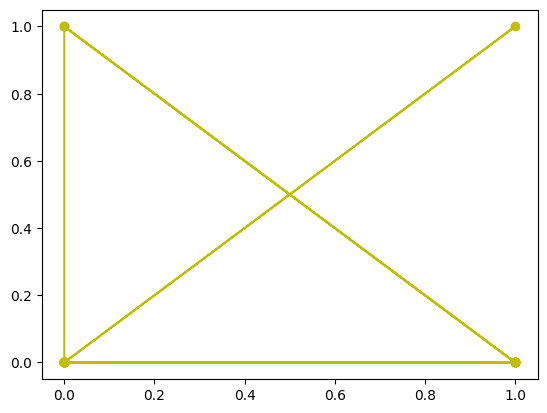

In [ ]:
plt.plot(x[:,0], x[:,1], 'y-o')
plt.savefig('contour.png')

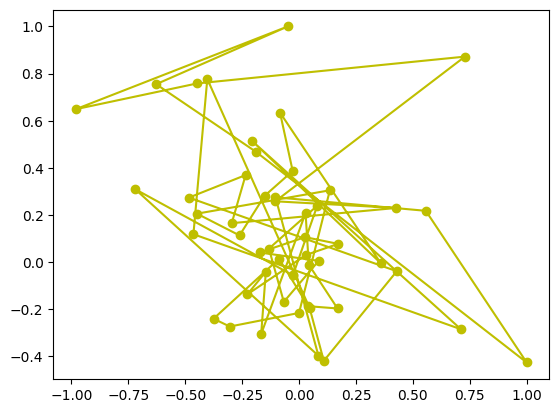

In [ ]:
plt.plot(x[:,0], x[:,1], 'y-o')
plt.savefig('contour.png')

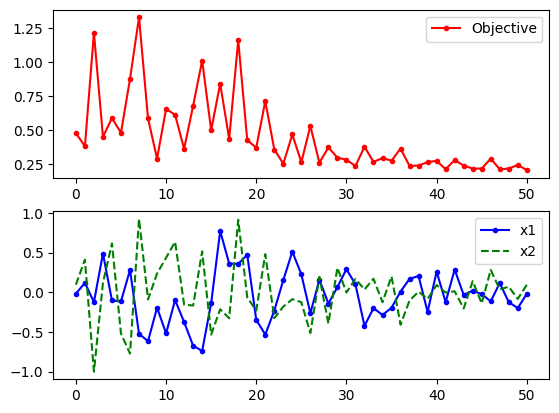

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(fs,'r.-')
ax1.legend(['Objective'])
ax2 = fig.add_subplot(212)
ax2.plot(x[:,0], 'b.-')
ax2.plot(x[:,1], 'g--')
ax2.legend(['x1','x2'])

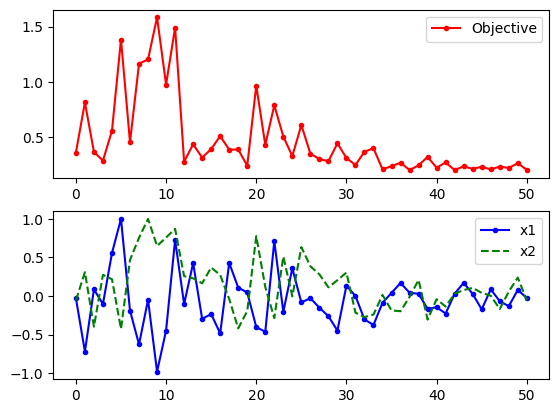

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(fs,'r.-')
ax1.legend(['Objective'])
ax2 = fig.add_subplot(212)
ax2.plot(x[:,0], 'b.-')
ax2.plot(x[:,1], 'g--')
ax2.legend(['x1','x2'])

# Simulated Annealing w/ 3 variables & sampling size of 0.1

In [ ]:
# define objective function for 3 varibles
def f(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    #obj = 0.2 + x1**2 + x2**2 + x**3
    obj = 0.5 + np.power(x1, 2) + np.power(x1, 2) + np.power(x3, 2)
    return obj

In [ ]:
# Start location for 3 variables
x_start_3 = [0.8, -0.5, 0.2]

In [ ]:
# Design variables at mesh points for 3 variables
i1 = np.arange(-1.0,1.0, 0.1)
i2 = np.arange(-1.0,1.0, 0.1)
i3 = np.arange(-1.0,1.0, 0.1)
x1m, x2m, x3m = np.meshgrid(i1,i2,i3)

In [ ]:
# Define a surface that we want to minimize for 3 variables
fm = np.zeros(x1m.shape)
for i in range(x1m.shape[0]):
    for j in range(x1m.shape[1]):
      for k in range(x1m.shape[2]):
        fm[i][j][k] = 0.2 + x1m[i][j][k]**2 + x2m[i][j][k]**2 + x3m[i][j][k]**2

In [ ]:
# simulated annealing for 3 varibales
# Number of cycles
n = 50
# Number of trials per cycle
m = 50
# Number of accepted solutions
na = 0.0
# Probability of accepting worse solution at the start
p1 = 0.7
p1 = 0.8
# Probability of accepting worse solution at the end
p50 = 0.001
# Initial temperature
t1 = -1.0 / math.log(p1)
# Final temperature
t50 = -1.0 / math.log(p50)
# Fraction reduction every cycle
frac = (t50/t1)**(1.0/(n-1.0))

# Initialize
# x_start_3 = [0.8, -0.5, 0.2]
x = np.zeros((n+1,3))
x[0] = x_start_3
xi = np.zeros(3)
xi = x_start_3
na = na + 1.0

In [ ]:
xi

[0.8, -0.5, 0.2]

In [ ]:
# Current best results so far for 3 variables
xc = np.zeros(3)
xc = x[0]
fc = f(xi)
fs = np.zeros(n+1)
fs[0] = fc
# Current temperature
t = t1
# DeltaE Average
DeltaE_avg = 0.0

In [ ]:
fc

1.8200000000000003

In [ ]:
for i in range(n):
    print("Cycle: %d with Temperature: %f" % (i, t))
    for j in range(m):
        # Generate new trial points
        xi[0] = xc[0] + random.random() - 0.5
        xi[1] = xc[1] + random.random() - 0.5
        xi[2] = xc[2] + random.random() - 0.5

        # Clip to upper and lower bounds
        xi[0] = max(min(xi[0],1.0), -1.0)
        xi[1] = max(min(xi[1],1.0), -1.0)
        xi[2] = max(min(xi[2],1.0), -1.0)

        DeltaE = abs(f(xi) - fc)
        if (f(xi) > fc):

            # Initialize DeltaE_avg if a worse solution was found
            # on the first iteration
            if (i==0 and j==0): DeltaE_avg = DeltaE

            # objective function is worse
            # generate prob of acceptance
            p = math.exp(-DeltaE/(DeltaE_avg * t))

            # determine whether to accept worse point
            if (random.random() < p):
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                accept = False
        else:

            # objective function is lower, automatically accept
            accept = True

        if (accept == True):

            # update the currently accepted solution
            xc[0] = xi[0]
            xc[1] = xi[1]
            xc[2] = xi[2]
            fc = f(xc)

            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na - 1.0) + DeltaE) / na

    # Record the best x values at the end of every cycle
    x[i+1][0] = xc[0]
    x[i+1][1] = xc[1]
    x[i+1][2] = xc[2]
    fs[i+1] = fc

    # Lower the temperature for the next cycle
    t = frac * t

# print solution
print( "Best solution: " + str(xc))
print( "Best objective: " + str(fc))

Cycle: 0 with Temperature: 4.481420
Cycle: 1 with Temperature: 4.178228
Cycle: 2 with Temperature: 3.895548
Cycle: 3 with Temperature: 3.631994
Cycle: 4 with Temperature: 3.386270
Cycle: 5 with Temperature: 3.157171
Cycle: 6 with Temperature: 2.943571
Cycle: 7 with Temperature: 2.744423
Cycle: 8 with Temperature: 2.558748
Cycle: 9 with Temperature: 2.385635
Cycle: 10 with Temperature: 2.224234
Cycle: 11 with Temperature: 2.073752
Cycle: 12 with Temperature: 1.933452
Cycle: 13 with Temperature: 1.802644
Cycle: 14 with Temperature: 1.680685
Cycle: 15 with Temperature: 1.566978
Cycle: 16 with Temperature: 1.460963
Cycle: 17 with Temperature: 1.362121
Cycle: 18 with Temperature: 1.269966
Cycle: 19 with Temperature: 1.184046
Cycle: 20 with Temperature: 1.103939
Cycle: 21 with Temperature: 1.029252
Cycle: 22 with Temperature: 0.959618
Cycle: 23 with Temperature: 0.894694
Cycle: 24 with Temperature: 0.834163
Cycle: 25 with Temperature: 0.777728
Cycle: 26 with Temperature: 0.725110
Cycle: 27 w

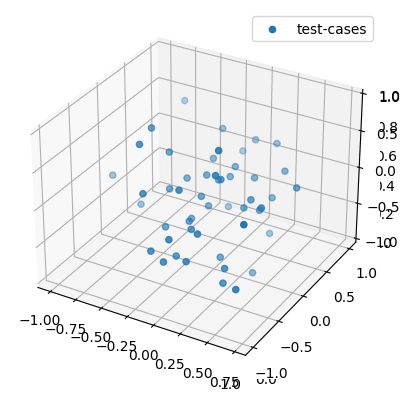

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-1.01, 1.01)
ax.set_zlim(-1.01, 1.01)
ax.set_zlim(-1.01, 1.01)
ax.scatter(x[:,0], x[:,1], x[:,2])
ax.legend(['test-cases'])

plt.show()


In [ ]:
print(x)

[[ 2.66788795e-01  3.84899938e-01 -3.34421078e-01]
 [-4.72356984e-01 -2.42277821e-01  8.25726926e-01]
 [ 2.68812701e-01 -4.73207889e-01  9.51248459e-01]
 [ 2.46535073e-01  6.13504367e-01 -8.44871002e-01]
 [ 7.23024337e-01 -9.42428357e-01  4.75383768e-01]
 [ 4.33663604e-01 -7.17871332e-01 -5.71300709e-01]
 [ 2.03497292e-01 -2.96841562e-01 -6.02559791e-01]
 [-3.79048373e-01 -9.93151803e-02  4.59492473e-01]
 [-7.42542698e-01  4.99780738e-02 -4.93871340e-01]
 [-4.12507704e-01 -5.73525645e-01  8.23350022e-01]
 [-9.63281917e-03 -6.44908648e-01  4.29444434e-01]
 [-1.00000000e+00  1.08717318e-02 -1.69292375e-01]
 [ 6.67347688e-01 -9.61830810e-01 -3.84623991e-01]
 [ 3.39770104e-01  6.59854904e-02 -1.00000000e+00]
 [ 2.36430440e-01  9.31136190e-02 -1.62314036e-01]
 [ 4.24325979e-01 -6.68563398e-01 -4.10976854e-01]
 [-1.21009422e-01  5.34127896e-01 -5.70236887e-01]
 [-7.87266243e-01  1.00000000e+00  3.81816589e-01]
 [ 1.13770515e-02  2.88688660e-01  5.21011892e-02]
 [ 3.66087520e-01 -4.69925783e-

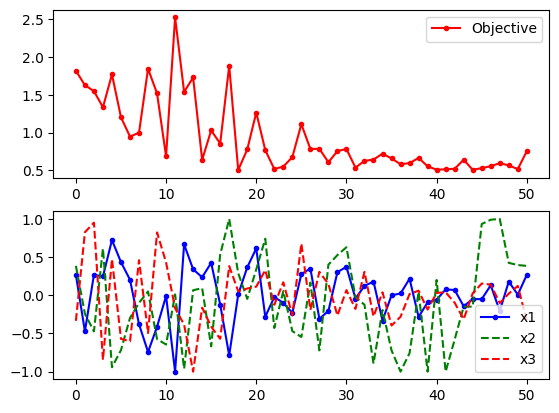

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(fs,'r.-')
ax1.legend(['Objective'])
ax2 = fig.add_subplot(212)
ax2.plot(x[:,0], 'b.-')
ax2.plot(x[:,1], 'g--')
ax2.plot(x[:,2], 'r--')
ax2.legend(['x1','x2','x3'])




#Simulated Annealing w/ 3 binary variables

---





In [ ]:
# define objective function for 3 varibles
def f(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    #obj = 0.2 + x1**2 + x2**2 + x**3
    obj = 0.5 + 10*np.power(x1, 2) + 5*np.power(x2, 2) + 2*np.power(x3, 2)
    return obj

In [ ]:
# Start location for 3 variables
x_start_3 = [1, 1, 1]

In [ ]:
# Design variables at mesh points for 3 variables
i1 = np.arange(0,1.0, 1)
i2 = np.arange(0,1.0, 1)
i3 = np.arange(0,1.0, 1)
x1m, x2m, x3m = np.meshgrid(i1,i2,i3)

In [ ]:
# Define a surface that we want to minimize for 3 variables
fm = np.zeros(x1m.shape)
for i in range(x1m.shape[0]):
    for j in range(x1m.shape[1]):
      for k in range(x1m.shape[2]):
        fm[i][j][k] = 0.2 + x1m[i][j][k]**2 + x2m[i][j][k]**2 + x3m[i][j][k]**2

In [ ]:
# simulated annealing for 3 varibales
# Number of cycles
n = 50
# Number of trials per cycle
m = 50
# Number of accepted solutions
na = 0.0
# Probability of accepting worse solution at the start
p1 = 0.7
p1 = 0.8
# Probability of accepting worse solution at the end
p50 = 0.001
# Initial temperature
t1 = -1.0 / math.log(p1)
# Final temperature
t50 = -1.0 / math.log(p50)
# Fraction reduction every cycle
frac = (t50/t1)**(1.0/(n-1.0))

# Initialize
# x_start_3 = [0.8, -0.5, 0.2]
x = np.zeros((n+1,3))
x[0] = x_start_3
xi = np.zeros(3)
xi = x_start_3
na = na + 1.0

In [ ]:
xi

[1, 1, 1]

In [ ]:
# Current best results so far for 3 variables
xc = np.zeros(3)
xc = x[0]
fc = f(xi)
fs = np.zeros(n+1)
fs[0] = fc
# Current temperature
t = t1
# DeltaE Average
DeltaE_avg = 0.0

In [ ]:
for i in range(n):
    print("Cycle: %d with Temperature: %f" % (i, t))
    for j in range(m):
        # Generate new trial points
        xi[0] = xc[0] + random.randrange(-1, 2, 1)
        xi[1] = xc[1] + random.randrange(-1, 2, 1)
        xi[2] = xc[2] + random.randrange(-1, 2, 1)

        # Clip to upper and lower bounds
        xi[0] = max(min(xi[0],1.0), 0)
        xi[1] = max(min(xi[1],1.0), 0)
        xi[2] = max(min(xi[2],1.0), 0)

        DeltaE = abs(f(xi) - fc)
        if (f(xi) > fc):

            # Initialize DeltaE_avg if a worse solution was found
            # on the first iteration
            if (i==0 and j==0): DeltaE_avg = DeltaE

            # objective function is worse
            # generate prob of acceptance
            p = math.exp(-DeltaE/(DeltaE_avg * t))

            # determine whether to accept worse point
            if (random.random() < p):
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                accept = False
        else:

            # objective function is lower, automatically accept
            accept = True

        if (accept == True):

            # update the currently accepted solution
            xc[0] = xi[0]
            xc[1] = xi[1]
            xc[2] = xi[2]
            fc = f(xc)

            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na - 1.0) + DeltaE) / na

    # Record the best x values at the end of every cycle
    x[i+1][0] = xc[0]
    x[i+1][1] = xc[1]
    x[i+1][2] = xc[2]
    fs[i+1] = fc

    # Lower the temperature for the next cycle
    t = frac * t

# print solution
print( "Best solution: " + str(xc))
print( "Best objective: " + str(fc))

Cycle: 0 with Temperature: 4.481420
Cycle: 1 with Temperature: 4.178228
Cycle: 2 with Temperature: 3.895548
Cycle: 3 with Temperature: 3.631994
Cycle: 4 with Temperature: 3.386270
Cycle: 5 with Temperature: 3.157171
Cycle: 6 with Temperature: 2.943571
Cycle: 7 with Temperature: 2.744423
Cycle: 8 with Temperature: 2.558748
Cycle: 9 with Temperature: 2.385635
Cycle: 10 with Temperature: 2.224234
Cycle: 11 with Temperature: 2.073752
Cycle: 12 with Temperature: 1.933452
Cycle: 13 with Temperature: 1.802644
Cycle: 14 with Temperature: 1.680685
Cycle: 15 with Temperature: 1.566978
Cycle: 16 with Temperature: 1.460963
Cycle: 17 with Temperature: 1.362121
Cycle: 18 with Temperature: 1.269966
Cycle: 19 with Temperature: 1.184046
Cycle: 20 with Temperature: 1.103939
Cycle: 21 with Temperature: 1.029252
Cycle: 22 with Temperature: 0.959618
Cycle: 23 with Temperature: 0.894694
Cycle: 24 with Temperature: 0.834163
Cycle: 25 with Temperature: 0.777728
Cycle: 26 with Temperature: 0.725110
Cycle: 27 w

In [ ]:
random.randrange(-1, 2, 1)

-1

In [ ]:
print(x)

[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 1. 0.]
 [0. 1. 0.]
 [0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [0. 0. 0.]
 [0. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


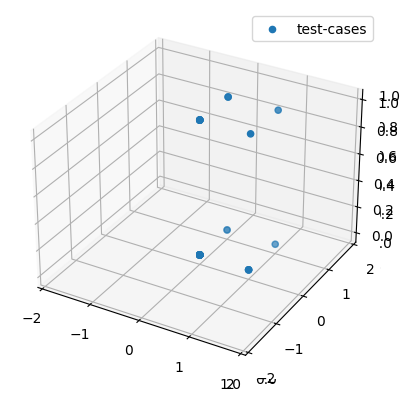

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-2.01, 2.01)
ax.set_ylim(-2.01, 2.01)
#ax.set_zlim(-1.01, 1.01)
ax.scatter(x[:,0], x[:,1], x[:,2])
ax.legend(['test-cases'])

plt.show()


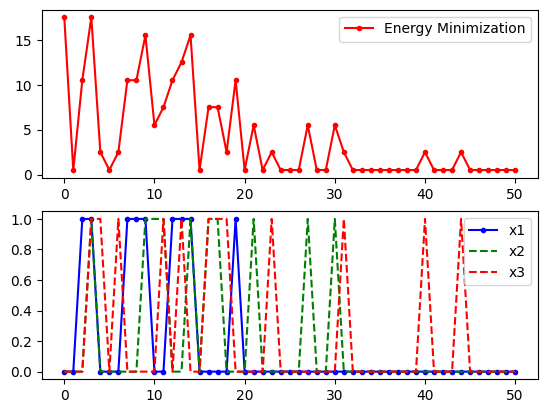

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(fs,'r.-')
ax1.legend(['Energy Minimization'])
ax2 = fig.add_subplot(212)
ax2.plot(x[:,0], 'b.-')
ax2.plot(x[:,1], 'g--')
ax2.plot(x[:,2], 'r--')
ax2.legend(['x1','x2','x3'])

#Simulated Annealing w/ 4 binary variables


In [ ]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [ ]:
# define objective function for 2^2 varibles
def f(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    #obj = 0.2 + x1**2 + x2**2 + x**3
    obj = 0.5 + 1*np.power(x1, 2) + 100*np.power(x2, 2) + 20*np.power(x3, 2) + 10*np.power(x4, 2)
    return obj

In [ ]:
# Start location for 2^2 variables
x_start_4 = [1, 1, 1, 1 ]

In [ ]:
# Design variables at mesh points for 2^2 variables
i1 = np.arange(0,1.0, 1)
i2 = np.arange(0,1.0, 1)
i3 = np.arange(0,1.0, 1)
i4 = np.arange(0,1.0, 1)
x1m, x2m, x3m, x4m = np.meshgrid(i1,i2,i3,i4)

In [ ]:
# Define a surface that we want to minimize for 2^2 variables
fm = np.zeros(x1m.shape)
for i in range(x1m.shape[0]):
    for j in range(x1m.shape[1]):
      for k in range(x1m.shape[2]):
        for l in range(x1m.shape[3]):
          fm[i][j][k][l] = 0.2 + x1m[i][j][k][l]**2 + x2m[i][j][k][l]**2 + x3m[i][j][k][l]**2 + x4m[i][j][k][l]**2

In [ ]:
# simulated annealing for 2^2 varibales
# Number of cycles
n = 50
# Number of trials per cycle
m = 50
# Number of accepted solutions
na = 0.0
# Probability of accepting worse solution at the start
p1 = 0.7
p1 = 0.8
# Probability of accepting worse solution at the end
p50 = 0.001
# Initial temperature
t1 = -1.0 / math.log(p1)
# Final temperature
t50 = -1.0 / math.log(p50)
# Fraction reduction every cycle
frac = (t50/t1)**(1.0/(n-1.0))

# Initialize
# x_start_4 = [1, 1, 1, 1]
x = np.zeros((n+1,4))
x[0] = x_start_4
xi = np.zeros(4)
xi = x_start_4
na = na + 1.0

In [ ]:
# Current best results so far for 2^2 variables
xc = np.zeros(4)
xc = x[0]
fc = f(xi)
fs = np.zeros(n+1)
fs[0] = fc
# Current temperature
t = t1
# DeltaE Average
DeltaE_avg = 0.0

In [ ]:
for i in range(n):
    print("Cycle: %d with Temperature: %f" % (i, t))
    for j in range(m):
        # Generate new trial points
        xi[0] = xc[0] + random.randrange(-1, 2, 1)
        xi[1] = xc[1] + random.randrange(-1, 2, 1)
        xi[2] = xc[2] + random.randrange(-1, 2, 1)
        xi[3] = xc[3] + random.randrange(-1, 2, 1)

        # Clip to upper and lower bounds
        xi[0] = max(min(xi[0],1.0), 0)
        xi[1] = max(min(xi[1],1.0), 0)
        xi[2] = max(min(xi[2],1.0), 0)
        xi[3] = max(min(xi[3],1.0), 0)

        DeltaE = abs(f(xi) - fc)
        if (f(xi) > fc):

            # Initialize DeltaE_avg if a worse solution was found
            # on the first iteration
            if (i==0 and j==0): DeltaE_avg = DeltaE

            # objective function is worse
            # generate prob of acceptance
            p = math.exp(-DeltaE/(DeltaE_avg * t))

            # determine whether to accept worse point
            if (random.random() < p):
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                accept = False
        else:

            # objective function is lower, automatically accept
            accept = True

        if (accept == True):

            # update the currently accepted solution
            xc[0] = xi[0]
            xc[1] = xi[1]
            xc[2] = xi[2]
            xc[3] = xi[3]
            fc = f(xc)

            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na - 1.0) + DeltaE) / na

    # Record the best x values at the end of every cycle
    x[i+1][0] = xc[0]
    x[i+1][1] = xc[1]
    x[i+1][2] = xc[2]
    x[i+1][3] = xc[3]
    fs[i+1] = fc

    # Lower the temperature for the next cycle
    t = frac * t

# print solution
print( "Best solution: " + str(xc))
print( "Best objective: " + str(fc))

Cycle: 0 with Temperature: 4.481420
Cycle: 1 with Temperature: 4.178228
Cycle: 2 with Temperature: 3.895548
Cycle: 3 with Temperature: 3.631994
Cycle: 4 with Temperature: 3.386270
Cycle: 5 with Temperature: 3.157171
Cycle: 6 with Temperature: 2.943571
Cycle: 7 with Temperature: 2.744423
Cycle: 8 with Temperature: 2.558748
Cycle: 9 with Temperature: 2.385635
Cycle: 10 with Temperature: 2.224234
Cycle: 11 with Temperature: 2.073752
Cycle: 12 with Temperature: 1.933452
Cycle: 13 with Temperature: 1.802644
Cycle: 14 with Temperature: 1.680685
Cycle: 15 with Temperature: 1.566978
Cycle: 16 with Temperature: 1.460963
Cycle: 17 with Temperature: 1.362121
Cycle: 18 with Temperature: 1.269966
Cycle: 19 with Temperature: 1.184046
Cycle: 20 with Temperature: 1.103939
Cycle: 21 with Temperature: 1.029252
Cycle: 22 with Temperature: 0.959618
Cycle: 23 with Temperature: 0.894694
Cycle: 24 with Temperature: 0.834163
Cycle: 25 with Temperature: 0.777728
Cycle: 26 with Temperature: 0.725110
Cycle: 27 w

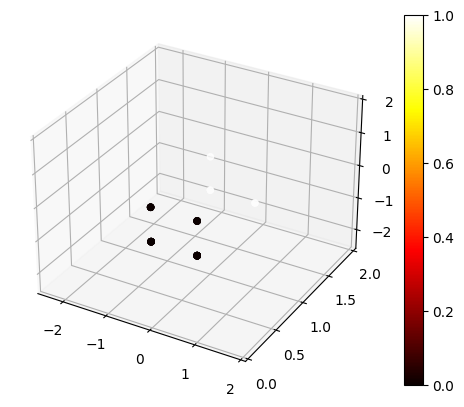

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-2.5, 2.01)
ax.set_ylim(0, 2.01)
ax.set_zlim(-2.5, 2.01)
img = ax.scatter(x[:,0], x[:,2], x[:,3], c=x[:,2], cmap=plt.hot())
fig.colorbar(img)
plt.show()


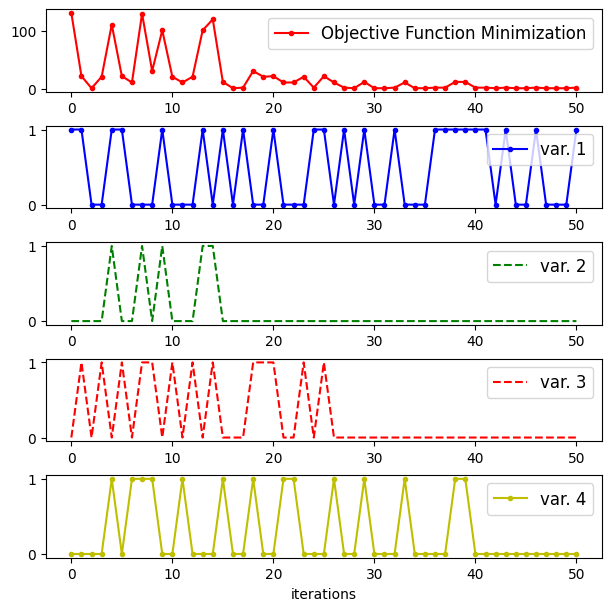

In [ ]:
import matplotlib.ticker as ticker
fig = plt.figure( figsize=(6,6), layout='constrained')


ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)



ax1.plot(fs,'r.-')
ax2.plot(x[:,0], 'b.-')
ax3.plot(x[:,1], 'g--')
ax4.plot(x[:,2], 'r--')
ax5.plot(x[:,3], 'y.-')

ax1.legend(['Objective Function Minimization'], fontsize = 12)
ax2.legend(['var. 1'], fontsize = 12)
ax3.legend(['var. 2'], fontsize = 12)
ax4.legend(['var. 3'], fontsize = 12)
ax5.legend(['var. 4'], fontsize = 12)

ax2.yaxis.set_major_locator(ticker.FixedLocator([0,1]))
ax3.yaxis.set_major_locator(ticker.FixedLocator([0,1]))
ax4.yaxis.set_major_locator(ticker.FixedLocator([0,1]))
ax5.yaxis.set_major_locator(ticker.FixedLocator([0,1]))


ax5.set_xlabel("iterations")

plt.savefig("convergence.pdf")



In [ ]:
print(x) #1

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]
 [1. 0. 0. 1.]
 [1. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
np.unique(x, return_counts=True,  axis=0) #1

(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 1.],
        [0., 1., 0., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [1., 1., 0., 0.],
        [1., 1., 0., 1.]]),
 array([18,  3,  1,  3,  1, 12,  3,  3,  5,  1,  1]))

In [ ]:
print(x) #2

[[1. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
np.unique(x, return_counts=True,  axis=0) #2

(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 1.],
        [0., 1., 1., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [1., 1., 0., 0.],
        [1., 1., 0., 1.],
        [1., 1., 1., 1.]]),
 array([11,  4,  4,  2,  1, 15,  4,  4,  1,  3,  1,  1]))

In [ ]:
print(x) #3

[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
np.unique(x, return_counts=True,  axis=0) #3

(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [1., 1., 1., 0.]]),
 array([22,  1,  1, 13,  6,  6,  1,  1]))

In [ ]:
print(x) #4

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
np.unique(x, return_counts=True,  axis=0) #4

(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.]]),
 array([12, 11,  5,  1, 15,  2,  1,  2,  1,  1]))

In [ ]:
print(x) #5

[[1. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
np.unique(x, return_counts=True,  axis=0) #5

(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 1.],
        [0., 1., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [1., 1., 0., 0.],
        [1., 1., 0., 1.],
        [1., 1., 1., 1.]]),
 array([13,  7,  2,  1,  2, 12,  5,  3,  3,  1,  1,  1]))

In [ ]:
print(x) #6

[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
np.unique(x, return_counts=True,  axis=0) #6

(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 1.]]),
 array([21,  6,  1, 17,  3,  3]))

In [ ]:
print(x) #7

[[1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
np.unique(x, return_counts=True,  axis=0) #7

(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 1.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 1., 0., 1.],
        [1., 1., 1., 0.]]),
 array([14,  3,  6,  4,  1, 18,  2,  1,  1,  1]))

In [ ]:
print(x) #8

[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
np.unique(x, return_counts=True,  axis=0) #8

(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 1.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [1., 1., 0., 0.],
        [1., 1., 0., 1.],
        [1., 1., 1., 0.]]),
 array([19,  7,  2,  2,  1,  9,  3,  3,  2,  1,  1,  1]))

In [ ]:
print(x) #9

[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
np.unique(x, return_counts=True,  axis=0) #9

(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 1.],
        [0., 1., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.]]),
 array([13,  6,  1,  3,  1, 11,  8,  5,  3]))

In [ ]:
print(x) #10

[[1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 1. 0. 1.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
np.unique(x, return_counts=True,  axis=0) #10

(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 1.],
        [0., 1., 1., 0.],
        [0., 1., 1., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [1., 1., 0., 1.]]),
 array([19,  5,  1,  2,  1, 11,  4,  2,  4,  2]))

In [ ]:
"""

----------
1st run
----------
(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 1.],
        [0., 1., 0., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [1., 1., 0., 0.],
        [1., 1., 0., 1.]]),
 array([18,  3,  1,  3,  1, 12,  3,  3,  5,  1,  1]))

----------
2nd run
----------
(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 1.],
        [0., 1., 1., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [1., 1., 0., 0.],
        [1., 1., 0., 1.],
        [1., 1., 1., 1.]]),
 array([11,  4,  4,  2,  1, 15,  4,  4,  1,  3,  1,  1]))

----------
3rd run
----------
(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [1., 1., 1., 0.]]),
 array([22,  1,  1, 13,  6,  6,  1,  1]))

----------
4th run
----------
(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.]]),
 array([12, 11,  5,  1, 15,  2,  1,  2,  1,  1]))

----------
5th run
----------
(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 1.],
        [0., 1., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [1., 1., 0., 0.],
        [1., 1., 0., 1.],
        [1., 1., 1., 1.]]),
 array([13,  7,  2,  1,  2, 12,  5,  3,  3,  1,  1,  1]))

----------
6th run
----------
(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 1.]]),
array([21,  6,  1, 17,  3,  3]))

----------
7th run
----------
(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 1.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 1., 0., 1.],
        [1., 1., 1., 0.]]),
 array([14,  3,  6,  4,  1, 18,  2,  1,  1,  1]))

----------
8th run
----------
(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 1.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [1., 1., 0., 0.],
        [1., 1., 0., 1.],
        [1., 1., 1., 0.]]),
 array([19,  7,  2,  2,  1,  9,  3,  3,  2,  1,  1,  1]))

----------
9th run
----------
(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 1.],
        [0., 1., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.]]),
array([13,  6,  1,  3,  1, 11,  8,  5,  3]))

----------
10th run
----------
(array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 1.],
        [0., 1., 1., 0.],
        [0., 1., 1., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [1., 1., 0., 1.]]),
array([19,  5,  1,  2,  1, 11,  4,  2,  4,  2]))

"""

# Sampling on Objective Function - Example

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[3.3, 1.8, 3.4, 0.0, 4.5, 0.9, 2.8, 1.0, 2.2, 4.1, 5.4, 4.2, 1.4, 1.2, 5.7, 2.7, 2.6, 1.9, 4.2, 4.9, 5.7, 4.1, 5.6, 2.7, 3.6]
[0.0899999999999999, 1.44, 0.15999999999999992, 9.0, 2.25, 4.41, 0.04000000000000007, 4.0, 0.6399999999999997, 1.2099999999999993, 5.760000000000002, 1.4400000000000004, 2.5600000000000005, 3.24, 7.290000000000001, 0.0899999999999999, 0.15999999999999992, 1.2100000000000002, 1.4400000000000004, 3.610000000000001, 7.290000000000001, 1.2099999999999993, 6.759999999999998, 0.0899999999999999, 0.3600000000000001]


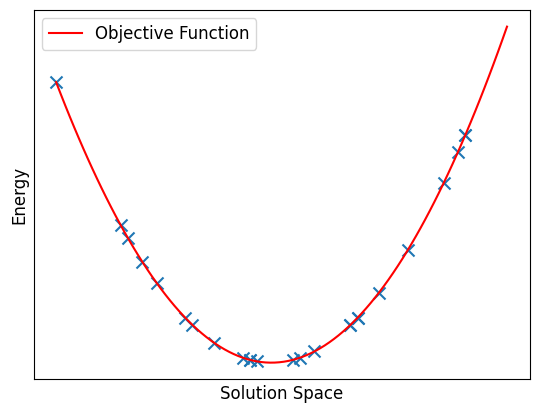

In [ ]:

mpl.rcParams["font.size"] = 12

# Generate data
x = np.linspace(0, 2*np.pi, 100)
y1 = (3 - x)**2

x_sampling = []
n=25
for i in range(n):
    x_sampling.append((random.randint(0,60))/10)
print(x_sampling)

y_sampling = []
for j in range(n):
    y_sampling.append((3-x_sampling[j])**2)
print(y_sampling)

# Plotting multiple lines on a single plot
plt.plot(x, y1, label='Objective Function', color='r')

plt.scatter(x_sampling, y_sampling,  marker='x', s=75)

# disabling xticks by Setting xticks to an empty list
plt.xticks([])

# disabling yticks by setting yticks to an empty list
plt.yticks([])

# Adding labels and title
plt.xlabel('Solution Space')
plt.ylabel('Energy')


# Displaying the legend and the plot
plt.legend()
plt.savefig("objective_2d.pdf")
plt.show()

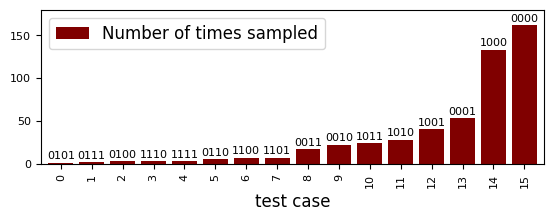

In [ ]:
# creating the dataset
mpl.rcParams["font.size"] = 8
import pandas as pd

fig = plt.figure(figsize = (6.5, 2))

X = ['0000', '0001','0010', '0011','0100', '0101','0110', '0111','1000','1001','1010','1011','1100','1101','1110','1111']
y = [162, 53, 22, 17, 3, 1, 5, 2, 133, 40, 28, 24, 7, 7, 3, 3]



bar = {}

for i in range(0,len(X)):
  bar.update({X[i]: y[i]})

bar_sorted = {k: v for k, v in sorted(bar.items(), key=lambda x: x[1])}

y_series = pd.Series(bar_sorted.values())
ax = y_series.plot(kind="bar", color ='maroon', width = 0.8)

rects = ax.patches


#plt.bar(list(bar_sorted.keys()), list(bar_sorted.values()), color ='maroon', width = 0.65)

#plt.bar(X, y, color ='maroon', width = 0.8)

for rect, label in zip(rects, bar_sorted.keys()):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 2, label, ha="center", va="bottom"
    )

plt.ylim((0,180))
plt.xlabel("test case", fontsize = 12)
plt.legend(["Number of times sampled"], fontsize = 12)
plt.savefig("sampled.pdf")
plt.show()